In [1]:
import cv2
img1 = cv2.imread('melon.jpg', cv2.IMREAD_GRAYSCALE)

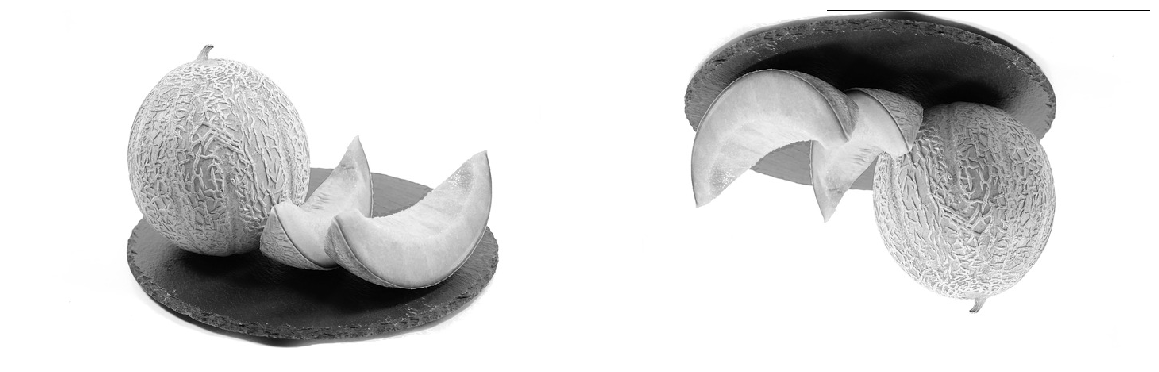

In [82]:
import matplotlib.pyplot as plt 
from scipy.ndimage.interpolation import rotate
img2 = rotate(img, angle=180)
plt.figure(figsize=(20, 10))
plt.subplot(121).imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(122).imshow(img2, cmap='gray')
plt.axis('off')
plt.savefig('input.png')
plt.show()

In [26]:
akaze = cv2.AKAZE_create()
kp1, desc1 = akaze.detectAndCompute(img1, None)
kp2, desc2 = akaze.detectAndCompute(img2, None)
matches = cv2.BFMatcher().match(desc1, desc2)

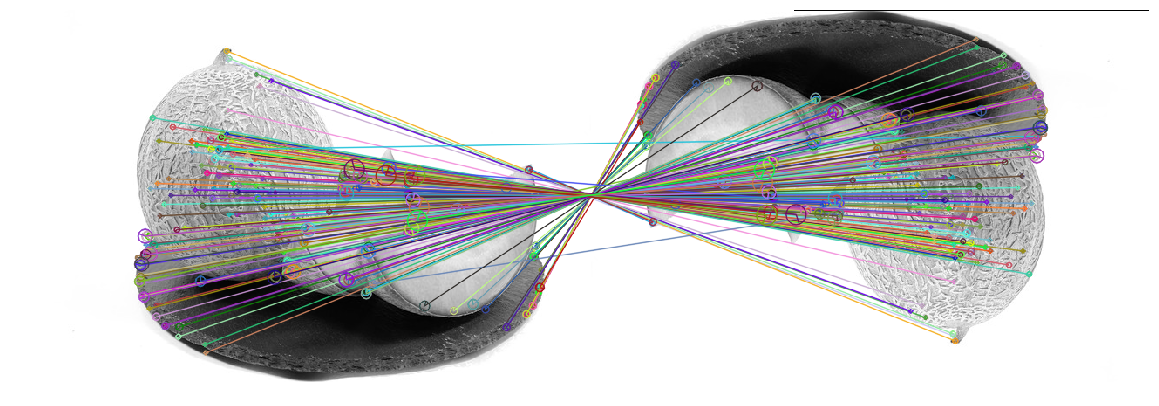

In [83]:
output_img = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=4)
plt.figure(figsize=(20, 10))
plt.imshow(output_img)
plt.axis('off')
plt.savefig('match.png')
plt.show()

In [72]:
img1_pt = [list(map(int, kp1[m.queryIdx].pt)) for m in matches[:]]
img2_pt = [list(map(int, kp2[m.trainIdx].pt)) for m in matches[:]]

In [73]:
img1_pt, img2_pt

([[223, 56],
  [255, 73],
  [272, 80],
  [259, 87],
  [223, 114],
  [196, 135],
  [221, 141],
  [219, 146],
  [181, 149],
  [144, 149],
  [227, 150],
  [187, 154],
  [223, 156],
  [245, 159],
  [182, 162],
  [209, 167],
  [253, 170],
  [254, 170],
  [231, 173],
  [249, 176],
  [261, 176],
  [192, 177],
  [213, 179],
  [244, 179],
  [257, 181],
  [223, 187],
  [231, 188],
  [155, 192],
  [262, 192],
  [142, 198],
  [229, 198],
  [275, 199],
  [255, 201],
  [134, 203],
  [207, 203],
  [185, 205],
  [272, 206],
  [277, 208],
  [270, 210],
  [157, 211],
  [238, 214],
  [234, 217],
  [150, 222],
  [264, 224],
  [289, 232],
  [272, 233],
  [224, 233],
  [233, 233],
  [145, 235],
  [298, 235],
  [265, 238],
  [303, 239],
  [344, 238],
  [337, 240],
  [308, 241],
  [275, 242],
  [300, 244],
  [332, 244],
  [287, 246],
  [173, 249],
  [266, 250],
  [301, 253],
  [280, 254],
  [288, 256],
  [285, 259],
  [292, 264],
  [129, 268],
  [129, 274],
  [572, 275],
  [287, 276],
  [577, 277],
  [283, 28

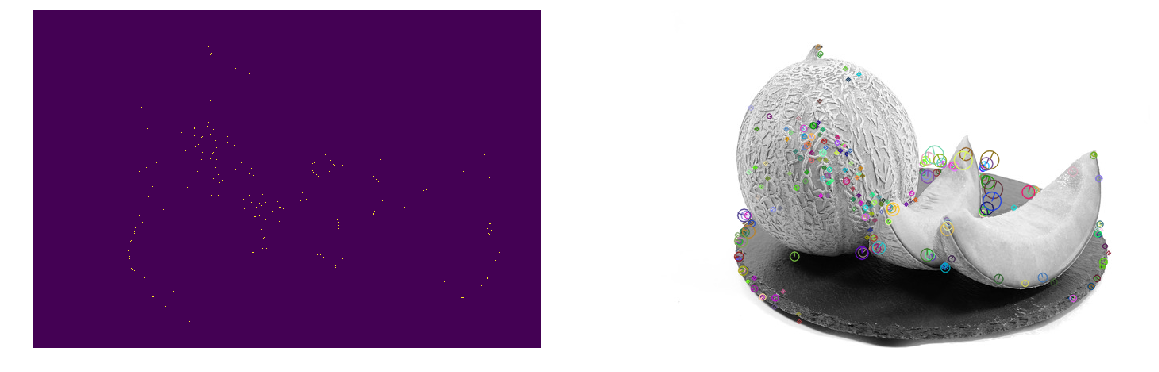

In [85]:
import numpy as np
post = np.zeros_like(img1)
for cord in img1_pt:
    post[cord[1], cord[0]] += 255
    
kp1_img = cv2.drawKeypoints(img1, kp1, None, flags=4)
plt.figure(figsize=(20, 10))
plt.subplot(121).imshow(post)
plt.axis('off')

plt.subplot(122).imshow(kp1_img, cmap='gray')
plt.axis('off')

plt.savefig('query.png')
plt.show()

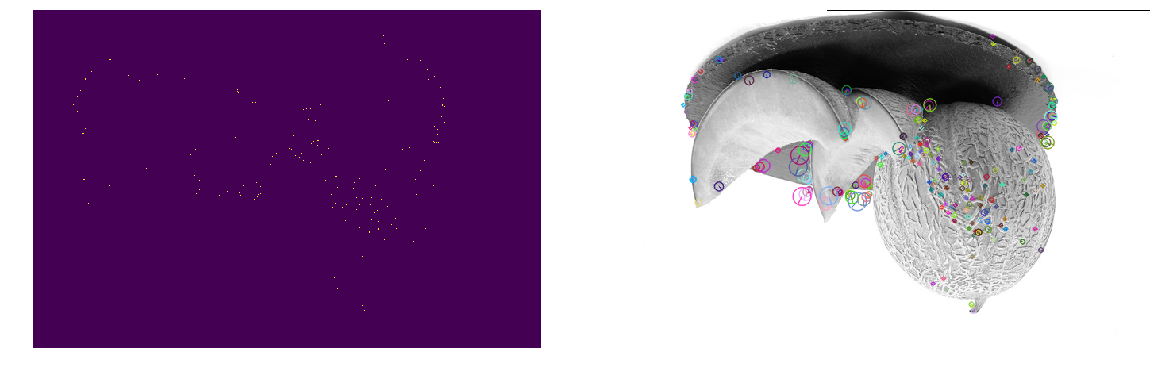

In [86]:
post2 = np.zeros_like(img2)
for cord in img2_pt:
    post2[cord[1], cord[0]] += 255
kp2_img = cv2.drawKeypoints(img2, kp2, None, flags=4)
plt.figure(figsize=(20, 10))
plt.subplot(121).imshow(post2)
plt.axis('off')

plt.subplot(122).imshow(kp2_img)
plt.axis('off')

plt.savefig('train.png')
plt.show()